# step 1: Load Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#sklearn import
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

#keras import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


# step 2: Load Dataset

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data

,VWTI,SWTI,CWTI,EI,Class
0,2.263400,-4.4862,3.65580,-0.612510,0
1,3.271800,1.7837,2.11610,0.613340,0
2,-3.941100,-12.8792,13.05970,-3.312500,1
3,0.519500,-3.2633,3.08950,-0.984900,0
4,2.569800,-4.4076,5.98560,0.078002,0
...,...,...,...,...,...
1091,1.640600,3.5488,1.39640,-0.364240,0
1092,-0.048008,-1.6037,8.47560,0.755580,0
1093,2.942100,7.4101,-0.97709,-0.884060,0
1094,1.964700,6.9383,0.57722,0.663770,0


# 3. Data Preprocessing

In [4]:
x=data.drop('Class', axis=1)
y=data['Class']

#train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


X_train,x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.2, random_state=42)

# Scaling
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)

y_train= y_train.values
y_val=y_val.values
y_test=y_test.values

# check shapes
print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')
print(f'x_val shape: {x_val.shape}, y_val shape: {y_val.shape}')
print(f'x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

x_train shape: (876, 4), y_train shape: (700,)
x_val shape: (176, 4), y_val shape: (176,)
x_test shape: (220, 4), y_test shape: (220,)


# 4. Build the ANN Model

In [5]:
# define The model
model=Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)), #input layer
    Dropout(0.3),  # droppout reduce overfitting
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping=EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model.summary()
    

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

# 5. Train the model

In [6]:
# Remove missing values
data = data.dropna()

# Separate features and target
x = data.drop('Class', axis=1)
y = data['Class']

# Train–validation split
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y   # keeps class balance
)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)


In [8]:
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=16,
    callbacks=[early_stopping],
    shuffle=True,
    verbose=1
)


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8447 - loss: 0.5192 - val_accuracy: 0.9273 - val_loss: 0.3049
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9247 - loss: 0.2427 - val_accuracy: 0.9727 - val_loss: 0.1106
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9669 - loss: 0.1187 - val_accuracy: 0.9818 - val_loss: 0.0552
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9715 - loss: 0.0776 - val_accuracy: 0.9818 - val_loss: 0.0400
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9760 - loss: 0.0611 - val_accuracy: 0.9909 - val_loss: 0.0260
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9852 - loss: 0.0434 - val_accuracy: 0.9864 - val_loss: 0.0223
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9840 - loss: 0.0374 - val_accuracy: 0.9909 - val_loss: 0.0171
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9920 - loss: 0.0240 - val_accuracy: 0.9955 - val_loss

In [9]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)


(876, 4) (876,)
(220, 4) (220,)


# 6. Evaluate the Model

In [10]:
from sklearn.model_selection import train_test_split

# First split: train + temp
x_train, x_temp, y_train, y_temp = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Second split: validation + test
x_val, x_test, y_val, y_test = train_test_split(
    x_temp,
    y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_val   = scaler.transform(x_val)
x_test  = scaler.transform(x_test)


In [12]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 6.4484e-04
Test Loss: 0.0006448371568694711
Test Accuracy: 1.0


In [13]:
print(x_test.shape)
print(y_test.shape)


(165, 4)
(165,)


In [14]:
y_pred=(model.predict(x_test) >0.5).astype(int)

print(classification_report(y_test,y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        73

    accuracy                           1.00       165
   macro avg       1.00      1.00      1.00       165
weighted avg       1.00      1.00      1.00       165



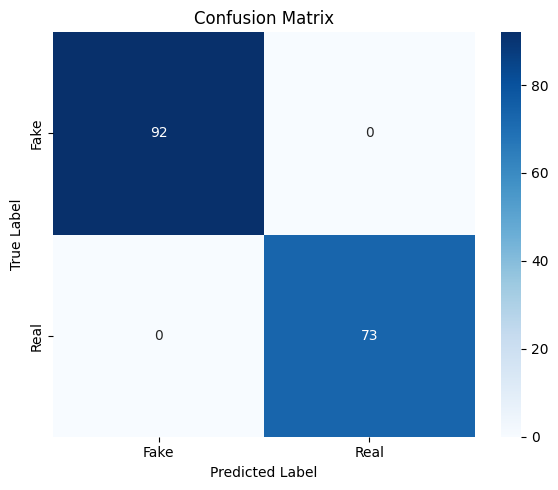

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Fake', 'Real'],
    yticklabels=['Fake', 'Real']
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()



# 8: Prediction System

In [16]:
def make_prediction(input_data):
    input_data_scaler = scaler.transform(input_data)

    prediction = model.predict(input_data_scaler)

    predicted_class=(prediction >0.5).astype(int)

    if predicted_class[0] == 1:
        return 'Real Note'
    else:
        return 'Fake Note'

In [17]:
# Example input data for prediction (replace with actual form data or array)
input_data = np.array([[1.5, 2.3, 3.4, 0.7]])

#Get the prediction
result = make_prediction(input_data)
print(result)  # with print 'Real' or 'Fake'  based on the prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Fake Note


C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [18]:
# Example input data for prediction (replace with actual form data or array)
input_data = np.array([[-3.9411, -12.8792, 13.0597, -3.3125]])

#Get the prediction
result = make_prediction(input_data)
print(result)  # with print 'Real' or 'Fake'  based on the prediction

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Real Note


# 9: Save Model

In [19]:
import pickle

model.save('models/model.h5')
# save the scaler using pickle
with open('models/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)